In [4]:
# importing all libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy as np

import math
import pandas as pd
from datetime import datetime
import datetime
from dateutil import relativedelta
import sys, csv ,operator

import base64

plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 6)

In [5]:
CALLS_DATASET = "data/call_in_progress_Jan1_2018_24Sep_2018.csv"
DURATION_DATASET = "data/call_duration_Jan1_2018_24Sep_2018.csv"
FRAUD_DATASET = "data/fraudcalls_Jan1_2018_24Sep_2018.csv"

In [6]:
#loading datasets

calls = pd.read_csv(CALLS_DATASET)
fraudcalls = pd.read_csv(FRAUD_DATASET)
callduration = pd.read_csv(DURATION_DATASET)

/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
# convert time 
calls['_time'] = pd.to_datetime(calls._time)
fraudcalls['_time'] = pd.to_datetime(fraudcalls._time)

#drop duplicates
calls.drop_duplicates(subset="vsg_tid",inplace=True)
callduration.drop_duplicates(subset="vsg_tid",inplace=True)

print(calls.shape, callduration.shape, len(calls.vsg_tid.unique()),len(callduration.vsg_tid.unique()))

((2571578, 9), (1865928, 2), 2571578, 1865928)


In [8]:
calls.head()

,_time,intuit_tid,vsg_tid,intuit_appid,intuit_offeringid,Called,ToState,ToZip,ToCity
0,2018-07-12 05:33:28.172,040738a0-a5be-4624-885a-3a1ee66b8db6,a852206c-b653-4dc5-90fc-cce2b2e61279,Intuit.platform.voiceservicegateway.voicetestc...,NaN,KzkxOTc0MTAwNDEwMA==,Karnataka,NaN,NaN
1,2018-05-25 06:13:35.987,1056b5a0-02d9-468f-8ece-4ca696864820,52e83a4a-392f-4042-adc3-2c10e420a159,Intuit.cto.iam.ticket,Intuit.platform.proseries.basic.ty17,KzEyNTM3NTI3NTI4,WA,98405,TACOMA
2,2018-05-31 07:03:01.150,9be29f6f-2113-4ef3-b06a-797392eb2e1a,6bcfdca9-01f7-47b2-aa50-997f1630989b,Intuit.cto.iam.ticket,Intuit.sbe.salsa.default,KzkxOTAzMDMyNDg3Mw==,Andhra Pradesh,NaN,NaN
3,2018-05-31 05:32:09.894,ec561b57-5990-4233-9766-38bd1a94ac77,d493d40a-2942-4edd-872f-91832917ef27,Intuit.cto.iam.ticket,Intuit.sbe.salsa.default,KzE5MDgzMzYyNTk2,NJ,08853,NESHANIC STA
4,2018-05-31 02:56:38.663,eda28455-d6f7-4e7b-bac4-e14967be2bf2,db4937cd-0c8a-4985-8fba-eff926214a87,Intuit.cto.iam.ticket,Intuit.ifs.mint,KzE5MTQzOTYwNTU4,NY,10710,YONKERS


In [6]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2571578 entries, 0 to 2571767
Data columns (total 9 columns):
_time                datetime64[ns]
intuit_tid           object
vsg_tid              object
intuit_appid         object
intuit_offeringid    object
Called               object
ToState              object
ToZip                object
ToCity               object
dtypes: datetime64[ns](1), object(8)
memory usage: 196.2+ MB


In [7]:
callduration.head()

,vsg_tid,Duration
0,3d70059f-9d70-4d31-8f23-26b027982dd7,5
1,c9528eec-025e-49a2-aa1e-dfcb9e8c5168,7
2,ce65e209-91ec-4836-9516-2480bb30a001,7
3,7b934028-a0f4-485e-8fde-f286d9e75e04,7
4,376904e3-c8eb-47df-a93c-3564de601d8b,7


In [8]:
callduration.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1865928 entries, 0 to 1866105
Data columns (total 2 columns):
vsg_tid     object
Duration    int64
dtypes: int64(1), object(1)
memory usage: 42.7+ MB


In [9]:
callduration.head()

,vsg_tid,Duration
0,3d70059f-9d70-4d31-8f23-26b027982dd7,5
1,c9528eec-025e-49a2-aa1e-dfcb9e8c5168,7
2,ce65e209-91ec-4836-9516-2480bb30a001,7
3,7b934028-a0f4-485e-8fde-f286d9e75e04,7
4,376904e3-c8eb-47df-a93c-3564de601d8b,7


In [10]:
callduration.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1865928 entries, 0 to 1866105
Data columns (total 2 columns):
vsg_tid     object
Duration    int64
dtypes: int64(1), object(1)
memory usage: 42.7+ MB


In [11]:
callduration.describe()

,Duration
count,1.865928e+06
mean,2.409361e+01
std,4.136430e+00
min,0.000000e+00
25%,2.300000e+01
50%,2.600000e+01
75%,2.700000e+01
max,6.500000e+01


In [9]:
# merge calls and callduration
df = pd.merge(calls, callduration, how="left",on="vsg_tid")

#validate the merge
print(calls.shape, callduration.shape, df.shape)

((2571578, 9), (1865928, 2), (2571578, 10))


### Data Analysis

In [15]:
#check which phone number is called frequently
df[df.Called.isin(df.Called.value_counts().index[:100])]

,_time,intuit_tid,vsg_tid,intuit_appid,intuit_offeringid,Called,ToState,ToZip,ToCity,Duration
15,2018-05-30 22:55:14.049,aa40c63c-1395-4ba2-802d-30c87320b2bb,d791f6a1-db3b-483f-9d7e-7a3c9a6a4762,Intuit.cto.iam.ticket,Intuit.smallbusiness.qbo.beanstalk,KzE0MDQ0NjIyODU2,GA,30082,SMYRNA,27.0
30,2018-05-30 20:36:47.561,ebb5cf5b-9d3c-4731-85f8-9cd06f20e72e,9a7ceb63-fa88-4be1-97f6-02b9bf0f2e3e,Intuit.cto.iam.ticket,Intuit.platform.lacertetax.lacertetaxty17,KzE3NzU0MjMxMDQw,NV,89406,FALLON,27.0
38,2018-05-30 19:50:53.539,d32dd3ea-084c-47ce-8bad-aa212eed7b8f,fbad11ce-8c1d-4317-b0f4-381c645d7de4,Intuit.cto.iam.ticket,Intuit.sbe.salsa.default,KzE2NjI1MzQwMDA2,MS,38610,NEW ALBANY,26.0
75,2018-05-30 16:03:49.678,6ffe3cc6-0621-45bd-91c9-126d46223654,f24d74e5-ccb6-4e7c-a928-00f4653771d8,Intuit.cto.iam.ticket,Intuit.apd.ito,KzE0MTczMzc5ODE3,MO,65739,BRANSON,23.0
99,2018-05-30 11:52:50.623,4e4ed1c3-3f6f-46c4-b5ad-8d0b8d85c386,82f69d71-3368-4fb2-a080-6c081acec752,Intuit.cto.iam.ticket,Intuit.sbe.salsa.default,KzE0NjkyMjI3NDE4,TX,75074,DALLAS,24.0
132,2018-05-29 19:47:15.786,31def36a-4999-4b6a-9284-2c6c6c8e265e,626e385e-b712-4012-a9c3-ad35bf9329d5,Intuit.cto.iam.ticket,Intuit.ems.iop,KzE5Mzc0Njk3MzAy,OH,45469,DAYTON,NaN
201,2018-05-29 12:28:16.967,80ba3e18-0179-4bf2-9dc8-09f619a822c0,c46a3d87-c64c-4f76-9713-376530b0ea73,Intuit.cto.iam.ius,Intuit.sbe.salsa.platform,KzE5MTIzODQ5MTMw,GA,31567,DOUGLAS,28.0
268,2018-05-27 16:39:53.148,0a7e1a05-f898-4fbb-b5e2-a5d540af3afe,17c0f17d-987b-42e0-bda7-a3d6041933ba,Intuit.cto.iam.ticket,Intuit.platform.proseries.basic.ty16,KzE5MDQzNDc1NTUy,FL,32218,ST AUGUSTINE,26.0
350,2018-05-25 17:00:41.512,6afc54ed-7727-4838-a79f-33f000567649,8df09b77-b2b6-4d9e-8967-a554c94c6130,Intuit.cto.iam.ticket,Intuit.sbe.salsa.default,KzE2MTk2Nzc2NDc1,CA,92103,SAN DIEGO,NaN
391,2018-05-24 19:03:51.350,3e11f3d2-2ae0-47fc-acb7-6bc4e4620cd0,9467725c-805f-4d60-a508-9ff1d00ea9f2,Intuit.cto.iam.ticket,Intuit.sbe.salsa.default,KzEzMjM1NzA2NDQ5,CA,90017,LOS ANGELES,16.0


In [13]:
# plot trend of calls daily
(df
 .set_index('_time')['Called']
 .resample('D')
 .agg(np.count_nonzero)
 .plot())

NameError: name 'df' is not defined

/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: 
.resample() is now a deferred operation
You called rolling(...) on this deferred object which materialized it into a dataframe
by implicitly taking the mean.  Use .resample(...).mean() instead


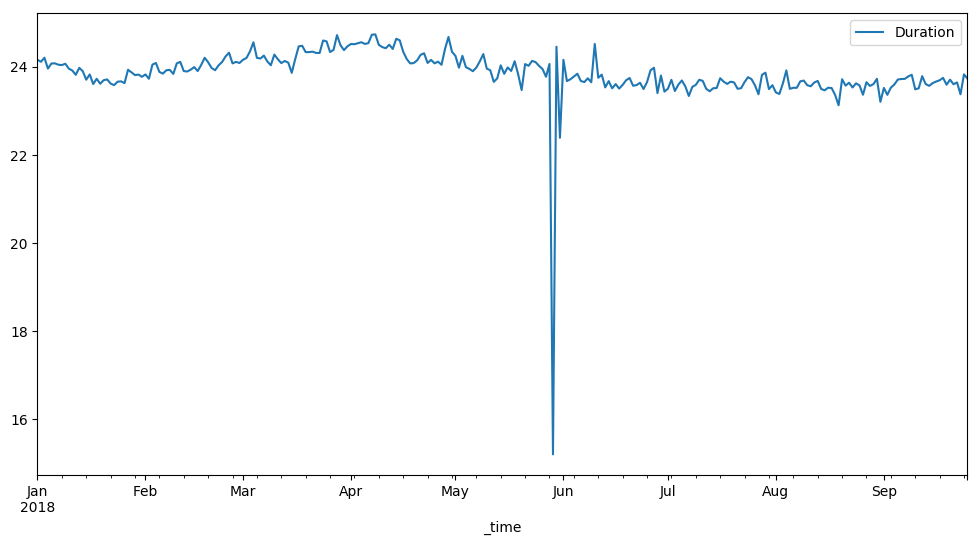

In [38]:
# plot trend of calls hourly
(df
 .set_index('_time')
 .resample('D')
 .rolling(1)
 .mean()
 .plot())

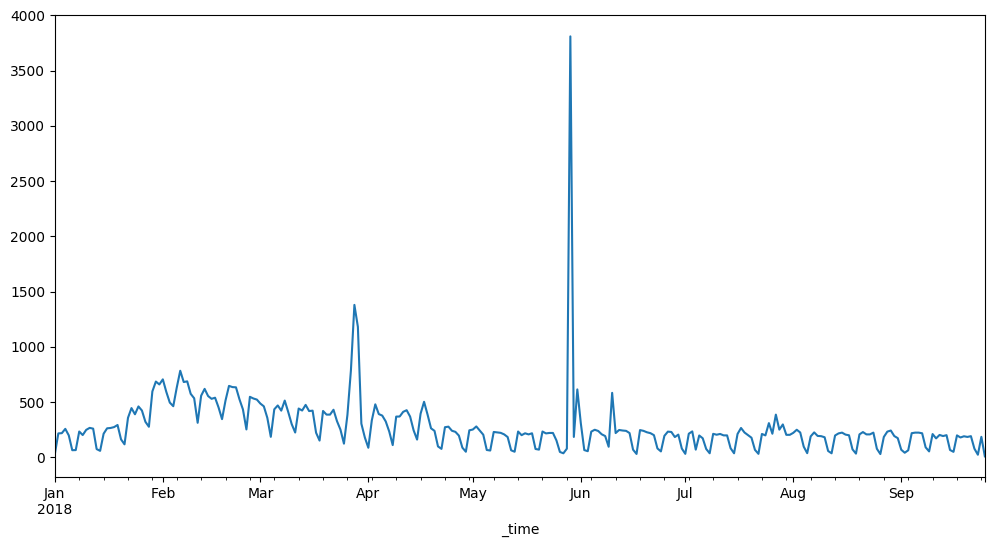

In [33]:
# plot the trend of calls daily for the top 1000 phone numbers
(df[df.Called.isin(df.Called.value_counts().index[:1000])]
 .set_index('_time')['Called']
 .resample('D')
 .agg(np.count_nonzero)
 .plot())

In [36]:
# pick the top 100 frequently called numbers to study their trend
df_100_frequent = df[df.Called.isin(df.Called.value_counts().index[:100])]
df_100_frequent.index[0]

15

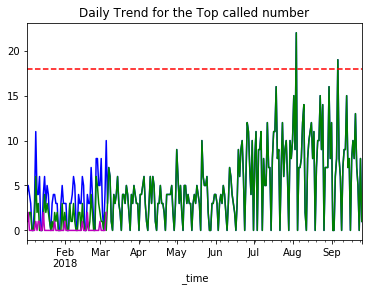

In [15]:
(df[df.Called==df.Called.value_counts().index[0]]
 .set_index('_time')['Called']
 .resample('D')
 .agg(np.count_nonzero)
 .plot(color='b'))

(df[(df.Called==df.Called.value_counts().index[0]) & (df.intuit_offeringid=='Intuit.sbe.salsa.default')]
 .set_index('_time')['Called']
 .resample('D')
 .agg(np.count_nonzero)
 .plot(color='g'))

(df[(df.Called==df.Called.value_counts().index[0]) & (df.intuit_offeringid=='Intuit.ifs.mint')]
 .set_index('_time')['Called']
 .resample('D')
 .agg(np.count_nonzero)
 .plot(color='m'))

plt.axhline(y=18, color='r', linestyle='--')
plt.title("Daily Trend for the Top called number")
plt.show()

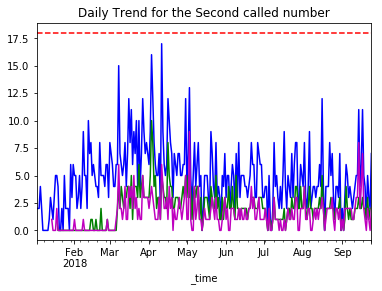

In [16]:
(df[df.Called==df.Called.value_counts().index[1]]
 .set_index('_time')['Called']
 .resample('D')
 .agg(np.count_nonzero)
 .plot(color='b'))

(df[(df.Called==df.Called.value_counts().index[1]) & (df.intuit_offeringid=='Intuit.platform.proseries.basic.ty17')]
 .set_index('_time')['Called']
 .resample('D')
 .agg(np.count_nonzero)
 .plot(color='g'))

(df[(df.Called==df.Called.value_counts().index[1]) & (df.intuit_offeringid=='Intuit.platform.proseries.ty17')]
 .set_index('_time')['Called']
 .resample('D')
 .agg(np.count_nonzero)
 .plot(color='m'))

plt.axhline(y=18, color='r', linestyle='--')
plt.title("Daily Trend for the Second called number")
plt.show()

### Features extraction

Based on the analysis and knowledge that we have currently, we wanted to extract the below mentioned features.
1. days since last call
2. calls in last 30 days
3. calls in last 7 days
4. calls in last 1 day
5. calls in last 1 hr
6. hour of the call
7. number starts with premium
8. was identified as fraud in last 6 months
9. was last call from same offering id

In [17]:
#extracting 'days_since_last_call'

In [39]:
df.head()

,_time,intuit_tid,vsg_tid,intuit_appid,intuit_offeringid,Called,ToState,ToZip,ToCity,Duration
0,2018-07-12 05:33:28.172,040738a0-a5be-4624-885a-3a1ee66b8db6,a852206c-b653-4dc5-90fc-cce2b2e61279,Intuit.platform.voiceservicegateway.voicetestc...,null,KzkxOTc0MTAwNDEwMA==,Karnataka,NaN,NaN,10.0
1,2018-05-25 06:13:35.987,1056b5a0-02d9-468f-8ece-4ca696864820,52e83a4a-392f-4042-adc3-2c10e420a159,Intuit.cto.iam.ticket,Intuit.platform.proseries.basic.ty17,KzEyNTM3NTI3NTI4,WA,98405,TACOMA,27.0
2,2018-05-31 07:03:01.150,9be29f6f-2113-4ef3-b06a-797392eb2e1a,6bcfdca9-01f7-47b2-aa50-997f1630989b,Intuit.cto.iam.ticket,Intuit.sbe.salsa.default,KzkxOTAzMDMyNDg3Mw==,Andhra Pradesh,NaN,NaN,27.0
3,2018-05-31 05:32:09.894,ec561b57-5990-4233-9766-38bd1a94ac77,d493d40a-2942-4edd-872f-91832917ef27,Intuit.cto.iam.ticket,Intuit.sbe.salsa.default,KzE5MDgzMzYyNTk2,NJ,08853,NESHANIC STA,26.0
4,2018-05-31 02:56:38.663,eda28455-d6f7-4e7b-bac4-e14967be2bf2,db4937cd-0c8a-4985-8fba-eff926214a87,Intuit.cto.iam.ticket,Intuit.ifs.mint,KzE5MTQzOTYwNTU4,NY,10710,YONKERS,15.0


In [15]:
data = df[df.Called=="KzkxOTc0MTAwNDEwMA=="].sort_values(by="_time",ascending=True)

In [16]:
data['prev_time'] = data._time.shift(1)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88 entries, 517111 to 351110
Data columns (total 11 columns):
_time                88 non-null datetime64[ns]
intuit_tid           88 non-null object
vsg_tid              88 non-null object
intuit_appid         88 non-null object
intuit_offeringid    0 non-null object
Called               88 non-null object
ToState              82 non-null object
ToZip                0 non-null object
ToCity               0 non-null object
Duration             33 non-null float64
prev_time            87 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(8)
memory usage: 8.2+ KB


In [17]:
data['days_since_lastcall'] = ((data['_time']) - (data['prev_time'])) / np.timedelta64(1,'D')

In [25]:
def dayssincelastcall(df,number):
    data = df[df.Called==number][['Called','_time','vsg_tid']].sort_values(by="_time",ascending=True)
    data['days_since_lastcall'] = data._time.diff(1) / np.timedelta64(1,'D')
    df = pd.merge(df,data[['vsg_tid','days_since_lastcall']],how="left",on="vsg_tid")
    return df

In [28]:
for number in df.Called.unique():
    df = dayssincelastcall(df,'KzkxOTc0MTAwNDEwMA==')

In [29]:
df

,_time,intuit_tid,vsg_tid,intuit_appid,intuit_offeringid,Called,ToState,ToZip,ToCity,Duration,days_since_lastcall
0,2018-07-12 05:33:28.172,040738a0-a5be-4624-885a-3a1ee66b8db6,a852206c-b653-4dc5-90fc-cce2b2e61279,Intuit.platform.voiceservicegateway.voicetestc...,NaN,KzkxOTc0MTAwNDEwMA==,Karnataka,NaN,NaN,10.0,16.265002
1,2018-05-25 06:13:35.987,1056b5a0-02d9-468f-8ece-4ca696864820,52e83a4a-392f-4042-adc3-2c10e420a159,Intuit.cto.iam.ticket,Intuit.platform.proseries.basic.ty17,KzEyNTM3NTI3NTI4,WA,98405,TACOMA,27.0,NaN
2,2018-05-31 07:03:01.150,9be29f6f-2113-4ef3-b06a-797392eb2e1a,6bcfdca9-01f7-47b2-aa50-997f1630989b,Intuit.cto.iam.ticket,Intuit.sbe.salsa.default,KzkxOTAzMDMyNDg3Mw==,Andhra Pradesh,NaN,NaN,27.0,NaN
3,2018-05-31 05:32:09.894,ec561b57-5990-4233-9766-38bd1a94ac77,d493d40a-2942-4edd-872f-91832917ef27,Intuit.cto.iam.ticket,Intuit.sbe.salsa.default,KzE5MDgzMzYyNTk2,NJ,08853,NESHANIC STA,26.0,NaN
4,2018-05-31 02:56:38.663,eda28455-d6f7-4e7b-bac4-e14967be2bf2,db4937cd-0c8a-4985-8fba-eff926214a87,Intuit.cto.iam.ticket,Intuit.ifs.mint,KzE5MTQzOTYwNTU4,NY,10710,YONKERS,15.0,NaN
5,2018-05-31 02:56:24.021,6ff1499c-89dc-4ac5-86f5-fb4acf74bad8,e5f6e7fc-8f81-4f3a-a0b2-dd1614069e6f,Intuit.cto.iam.ius,Intuit.cg.myturbotax,KzEzMTM4MjY0ODEz,MI,48209,DETROIT,27.0,NaN
6,2018-05-31 02:05:17.046,392ba5d0-f7d1-447f-b836-8d61de8c586f,8350c788-79a9-4583-9389-2023de9b18cc,Intuit.cto.iam.ticket,Intuit.cg.myturbotax,KzE3NzA1Mzk1NjI2,GA,30564,GAINESVILLE,27.0,NaN
7,2018-05-31 02:04:54.882,f5c0265d-9364-4ce9-aeee-27ebe7ea2382,f4511a33-6770-4472-bd4a-ca122afca860,Intuit.cto.iam.ticket,Intuit.cg.myturbotax,KzE0MTA2OTg1NzEy,MD,21051,FORK,26.0,NaN
8,2018-05-31 01:56:08.217,e1b915fb-1669-4f6d-beae-e6498fd23bd8,6f6b8541-6273-438b-89de-0afefc4d4fbe,Intuit.cto.iam.ius,Intuit.platform.estore101.quickbooks,KzEzMDU2MzQwNzY3,FL,33127,MIAMI,30.0,NaN
9,2018-05-31 01:44:23.696,86db8049-9ac0-4d07-8cf5-b24418af547f,075a1500-eaec-40ee-a473-7b421dc71769,Intuit.cto.iam.ius,Intuit.cg.myturbotax,KzEyMjgyMTkzMzQw,MS,39562,PASCAGOULA,26.0,NaN


In [40]:
array = np.array(df.Called.unique())
len(array)

1254027

In [59]:
for x in range(len(array)):
    if(x % 2 == 0):
        print x
    df = dayssincelastcall(df,array[x])

0


KeyboardInterrupt: 

In [57]:
(df.Called.value_counts()<10).sum(), len(df.Called.unique()), len(df.Called.unique())-(df.Called.value_counts()<10).sum()

(1240404, 1254027, 13623)

In [56]:
data.head()

,_time,intuit_tid,vsg_tid,intuit_appid,intuit_offeringid,Called,ToState,ToZip,ToCity,Duration,prev_time
517111,2018-01-18 07:09:50.783,071a423c-f5c2-4c8d-9dbf-3dd935326af5,1346f2b0-551e-4a31-b797-5414b209aa42,Intuit.platform.voiceservicegateway.voicetestc...,null,KzkxOTc0MTAwNDEwMA==,NaN,NaN,NaN,4.0,NaT
1044729,2018-01-18 07:10:37.848,abf2397c-7762-4fc8-949d-993a5e17ec54,2921466c-414d-4957-a59b-188d71192500,Intuit.platform.voiceservicegateway.voicetestc...,null,KzkxOTc0MTAwNDEwMA==,NaN,NaN,NaN,13.0,2018-01-18 07:09:50.783
2093753,2018-03-11 03:18:30.702,fdbdd9ae-fa74-4209-a819-01a68a672031,ade03e65-76d9-49dd-8815-6bf1761e6c91,Intuit.platform.voiceservicegateway.voicetestc...,null,KzkxOTc0MTAwNDEwMA==,NaN,NaN,NaN,6.0,2018-01-18 07:10:37.848
2405814,2018-03-11 03:23:24.219,3d321c5c-5dda-46a0-95d5-5bf7514a0707,85418dd6-9b68-42c7-bf28-ff9010286387,Intuit.platform.voiceservicegateway.voicetestc...,null,KzkxOTc0MTAwNDEwMA==,NaN,NaN,NaN,5.0,2018-03-11 03:18:30.702
154767,2018-05-20 10:20:25.458,4d6d0ab6-a830-4592-c6a0-bb7d8438fcfe,695dccbb-fab6-48a0-94a6-139291fec6ce,Intuit.platform.voiceservicegateway.voicetestc...,null,KzkxOTc0MTAwNDEwMA==,NaN,NaN,NaN,6.0,2018-03-11 03:23:24.219


In [52]:
df.head()

,_time,intuit_tid,vsg_tid,intuit_appid,intuit_offeringid,Called,ToState,ToZip,ToCity,Duration,prev_time
0,2018-07-12 05:33:28.172,040738a0-a5be-4624-885a-3a1ee66b8db6,a852206c-b653-4dc5-90fc-cce2b2e61279,Intuit.platform.voiceservicegateway.voicetestc...,null,KzkxOTc0MTAwNDEwMA==,Karnataka,NaN,NaN,10.0,KzkxOTc0MTAwNDEwMA==
1,2018-05-25 06:13:35.987,1056b5a0-02d9-468f-8ece-4ca696864820,52e83a4a-392f-4042-adc3-2c10e420a159,Intuit.cto.iam.ticket,Intuit.platform.proseries.basic.ty17,KzEyNTM3NTI3NTI4,WA,98405,TACOMA,27.0,KzEyNTM3NTI3NTI4
2,2018-05-31 07:03:01.150,9be29f6f-2113-4ef3-b06a-797392eb2e1a,6bcfdca9-01f7-47b2-aa50-997f1630989b,Intuit.cto.iam.ticket,Intuit.sbe.salsa.default,KzkxOTAzMDMyNDg3Mw==,Andhra Pradesh,NaN,NaN,27.0,KzkxOTAzMDMyNDg3Mw==
3,2018-05-31 05:32:09.894,ec561b57-5990-4233-9766-38bd1a94ac77,d493d40a-2942-4edd-872f-91832917ef27,Intuit.cto.iam.ticket,Intuit.sbe.salsa.default,KzE5MDgzMzYyNTk2,NJ,08853,NESHANIC STA,26.0,KzE5MDgzMzYyNTk2
4,2018-05-31 02:56:38.663,eda28455-d6f7-4e7b-bac4-e14967be2bf2,db4937cd-0c8a-4985-8fba-eff926214a87,Intuit.cto.iam.ticket,Intuit.ifs.mint,KzE5MTQzOTYwNTU4,NY,10710,YONKERS,15.0,KzE5MTQzOTYwMDY2


In [61]:
df.set_index('_time').head()

,intuit_tid,vsg_tid,intuit_appid,intuit_offeringid,Called,ToState,ToZip,ToCity,Duration,days_since_lastcall_x,...,days_since_lastcall_y,days_since_lastcall_x,days_since_lastcall_y,days_since_lastcall_x,days_since_lastcall_y,days_since_lastcall_x,days_since_lastcall_y,days_since_lastcall_x,days_since_lastcall_y,days_since_lastcall
_time,,,,,,,,,,,,,,,,,,,,,
2018-07-12 05:33:28.172,040738a0-a5be-4624-885a-3a1ee66b8db6,a852206c-b653-4dc5-90fc-cce2b2e61279,Intuit.platform.voiceservicegateway.voicetestc...,NaN,KzkxOTc0MTAwNDEwMA==,Karnataka,NaN,NaN,10.0,16.265002,...,NaN,NaN,NaN,NaN,NaN,NaN,16.265002,NaN,NaN,16.265002
2018-05-25 06:13:35.987,1056b5a0-02d9-468f-8ece-4ca696864820,52e83a4a-392f-4042-adc3-2c10e420a159,Intuit.cto.iam.ticket,Intuit.platform.proseries.basic.ty17,KzEyNTM3NTI3NTI4,WA,98405,TACOMA,27.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.506802,NaN,NaN
2018-05-31 07:03:01.150,9be29f6f-2113-4ef3-b06a-797392eb2e1a,6bcfdca9-01f7-47b2-aa50-997f1630989b,Intuit.cto.iam.ticket,Intuit.sbe.salsa.default,KzkxOTAzMDMyNDg3Mw==,Andhra Pradesh,NaN,NaN,27.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65.111753,NaN
2018-05-31 05:32:09.894,ec561b57-5990-4233-9766-38bd1a94ac77,d493d40a-2942-4edd-872f-91832917ef27,Intuit.cto.iam.ticket,Intuit.sbe.salsa.default,KzE5MDgzMzYyNTk2,NJ,08853,NESHANIC STA,26.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-31 02:56:38.663,eda28455-d6f7-4e7b-bac4-e14967be2bf2,db4937cd-0c8a-4985-8fba-eff926214a87,Intuit.cto.iam.ticket,Intuit.ifs.mint,KzE5MTQzOTYwNTU4,NY,10710,YONKERS,15.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
